In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches
import pickle
import numpy as np
from src import agent
# from adaptive_Agent import AdaptiveDiscretization
# from eNet_Agent import eNet
import pandas as pd

%matplotlib inline

In [2]:
x = [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
y = [0.14285715, 0.07142857, 0.07142857, 0.07142857, 0.07142857, 0.07142857,
 0.07142857, 0.07142857, 0.07142857, 0.07142857, 0.07142857, 0.07142857,
 0.07142857]

In [3]:
np.dot(x,y)

4.999999949999999

In [4]:

epLen = 5
nEps = 2000

problem = 'beta'
param = '0'

# name_adapt = './data/ambulance_'+problem+'_'+'adapt_'+param+'.csv'
name_adapt_model_based = './data/ambulance_'+problem+'_'+'adapt_model_'+param+'.csv'
name_enet_model = './data/ambulance_'+problem+'_'+'net_model_'+param+'.csv'



In [5]:
dt_adapt_model = pd.read_csv(name_adapt_model_based).groupby(['episode']).mean()

In [6]:
dt_adapt_model['episode'] = dt_adapt_model.index.values
dt_adapt_model = dt_adapt_model.iloc[::10, :]

In [7]:
dt_net_model = pd.read_csv(name_enet_model).groupby(['episode']).mean()

In [8]:
dt_net_model['episode'] = dt_net_model.index.values
dt_net_model = dt_net_model.iloc[::10, :]

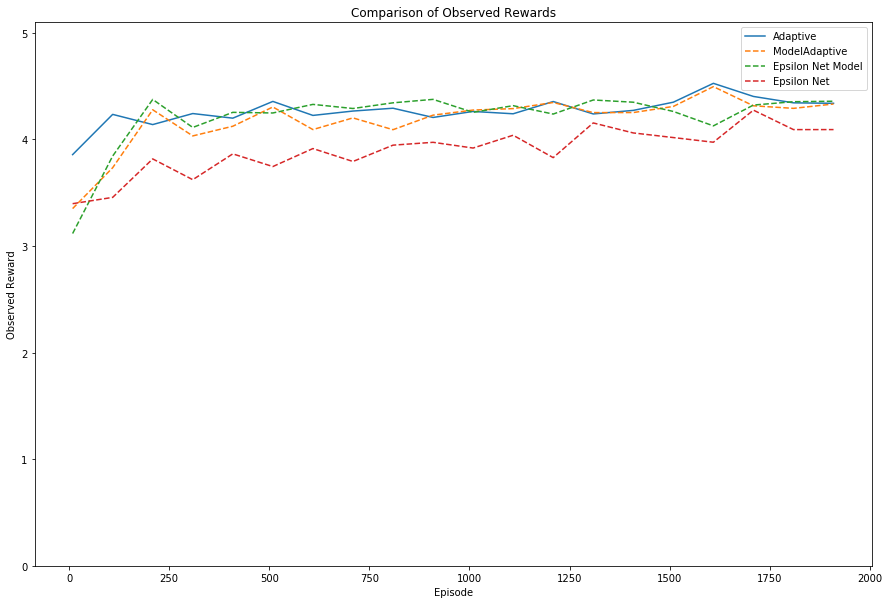

In [19]:


name_adapt = './data/ambulance_'+problem+'_'+'adapt_'+param+'.csv'
name_net ='./data/ambulance_'+problem+'_'+'net_'+param+'.csv'
name_median = './data/ambulance_'+problem+'_'+'median_'+param+'.csv'
name_no = './data/ambulance_'+problem+'_'+'no_'+param+'.csv'
name_obj = './data/ambulance_'+problem+'_agent_'+param+'.obj'


dt_adapt = pd.read_csv(name_adapt).groupby(['episode']).mean()
dt_net = pd.read_csv(name_net).groupby(['episode']).mean()
# dt_median = pd.read_csv(name_median).groupby(['episode']).mean()
# dt_no = pd.read_csv(name_no).groupby(['episode']).mean()
dt_adapt['episode'] = dt_adapt.index.values
dt_net['episode'] = dt_net.index.values
dt_net = dt_net.iloc[::10, :]
dt_adapt = dt_adapt.iloc[::10, :]
# dt_median['episode'] = dt_median.index.values
# dt_no['episode'] = dt_no.index.values
# dt_no = dt_no.iloc[::10, :]
# dt_median = dt_median.iloc[::10, :]


fig = plt.figure(figsize=(15, 10))
plt.title('Comparison of Observed Rewards')
plt.plot(dt_adapt['episode'], dt_adapt['epReward'], label='Adaptive')
plt.plot(dt_adapt_model['episode'], dt_adapt_model['epReward'], label='ModelAdaptive', linestyle='--')
plt.plot(dt_net_model['episode'], dt_net_model['epReward'], label='Epsilon Net Model', linestyle='--')
plt.plot(dt_net['episode'], dt_net['epReward'], label = 'Epsilon Net', linestyle='--')
# plt.plot(dt_median['episode'], dt_median['epReward'], label='Median', linestyle=':')
# plt.plot(dt_no['episode'], dt_no['epReward'], label = 'No Movement', linestyle='-.')

plt.ylim(0,epLen+.1)
plt.xlabel('Episode')
plt.ylabel('Observed Reward')
plt.legend()

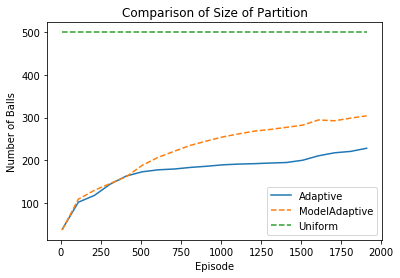

In [15]:
plt.plot(dt_adapt['episode'], dt_adapt['Number of Balls'], label='Adaptive')
plt.plot(dt_adapt_model['episode'], dt_adapt_model['Number of Balls'], label='ModelAdaptive', linestyle='--')
plt.plot(dt_net_model['episode'], dt_net_model['Number of Balls'], label='Uniform', linestyle = '--')
plt.xlabel('Episode')
plt.ylabel('Number of Balls')
plt.title('Comparison of Size of Partition')
plt.legend()
plt.show()

In [11]:
h = 2

Text(0.5, 1.0, 'Adaptive Discretization for Step 2')

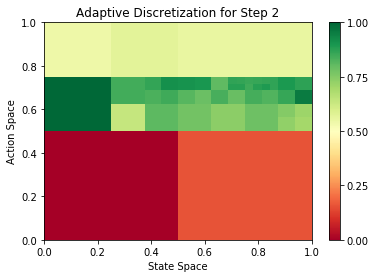

In [12]:
name_obj = './data/ambulance_'+problem+'_adapt_'+param
infile = open(name_obj,'rb')
agent = pickle.load(infile)
infile.close()
tree = agent.tree_list[4]
tree.plot_q(fig, h)
plt.title('Adaptive Discretization for Step 2')

Text(0.5, 1.0, 'Adaptive Discretization for Step 2')

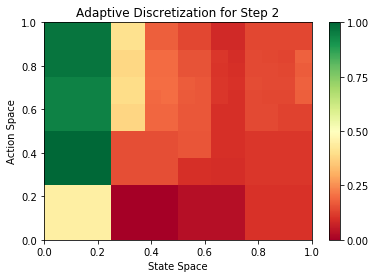

In [17]:
name_obj = './data/ambulance_'+problem+'_adapt_model_'+param
infile = open(name_obj,'rb')
agent = pickle.load(infile)
infile.close()
tree = agent.tree_list[h]
tree.plot_q(fig, h)
plt.title('Adaptive Discretization for Step 2')